In [2]:
# Import Libraries 
from plantcv import plantcv as pcv

In [5]:
class options:
    def __init__(self):
        self.image_path = "./src/database/plants/stage08.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

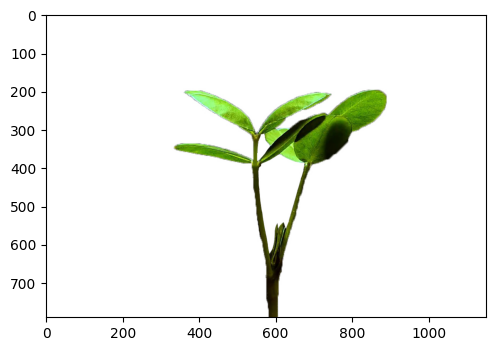

In [6]:
# Read image
raw_img, path, filename = pcv.readimage(filename=args.image_path)

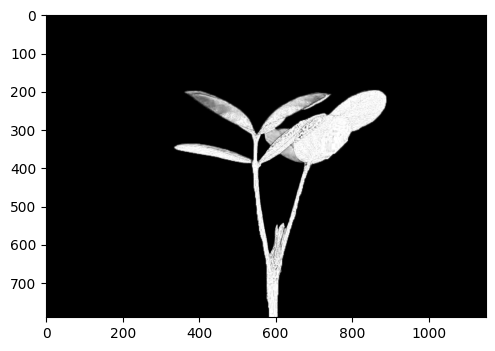

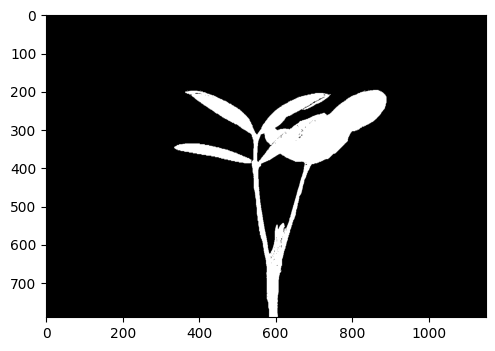

In [7]:
# Convert RGB to HSV and extract the saturation channel
saturation = pcv.rgb2gray_hsv(rgb_img=raw_img, channel='s')

# Take a binary threshold to separate plant from background.
binary_img = pcv.threshold.binary(gray_img=saturation, threshold=85, max_value=255, object_type='light')

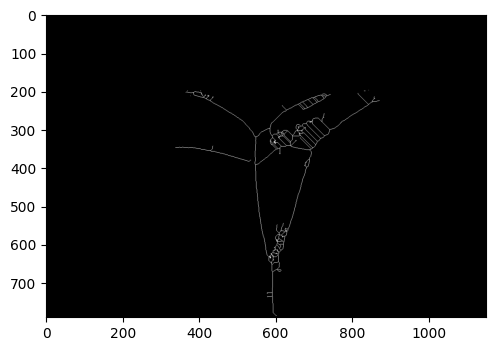

In [8]:
skeleton_img = pcv.morphology.skeletonize(binary_img)

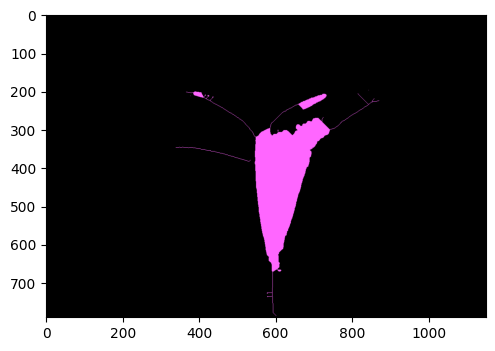

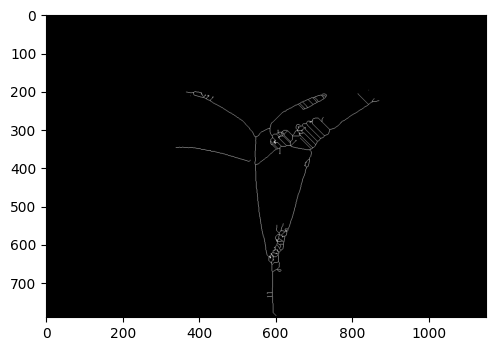

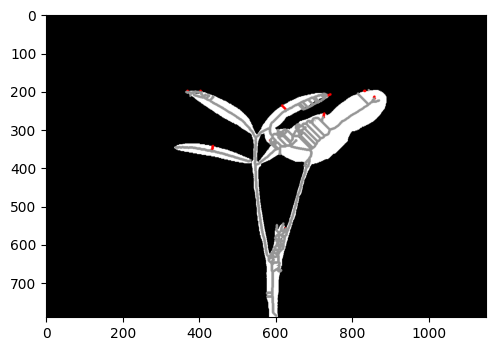

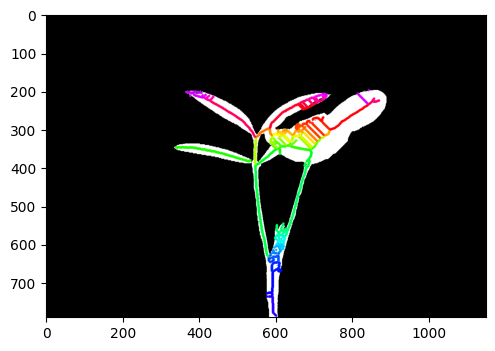

In [21]:
purned_img, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton_img, size=30,mask=binary_img)

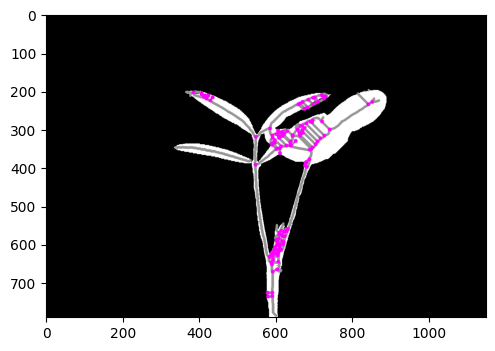

In [22]:
branched_img = pcv.morphology.find_branch_pts(skel_img=purned_img, mask=binary_img)

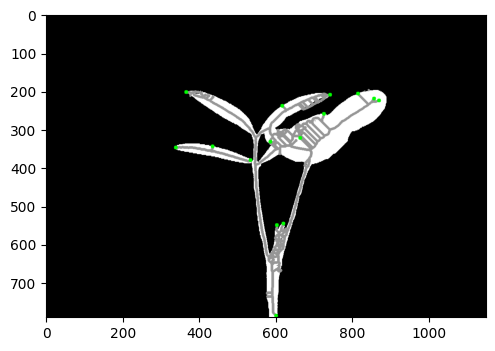

In [11]:
tips_img = pcv.morphology.find_tips(skel_img=purned_img, label="tips",mask=binary_img)

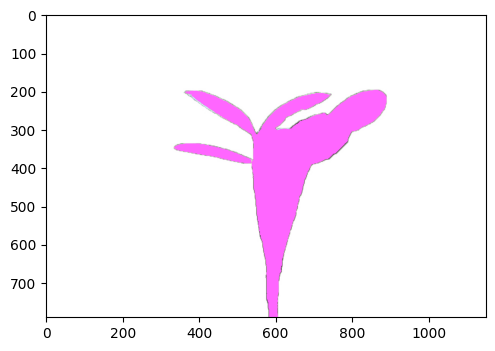

In [12]:
identified_img, obj_hierarchy = pcv.find_objects(img=raw_img, mask=binary_img)

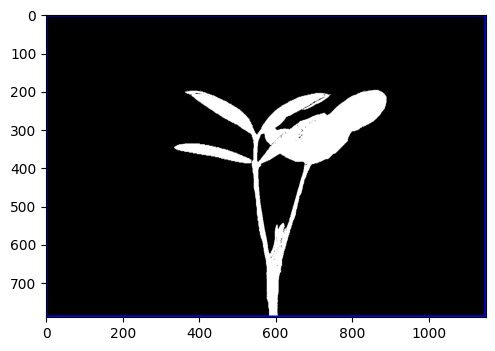

In [13]:
# Define the region of interest (ROI)
roi1, roi_hierarchy= pcv.roi.rectangle(img=binary_img, x=0, y=0, h=790, w=1150)

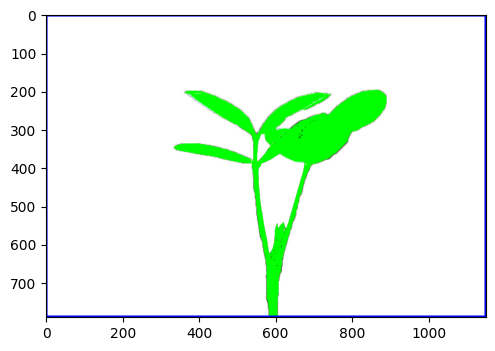

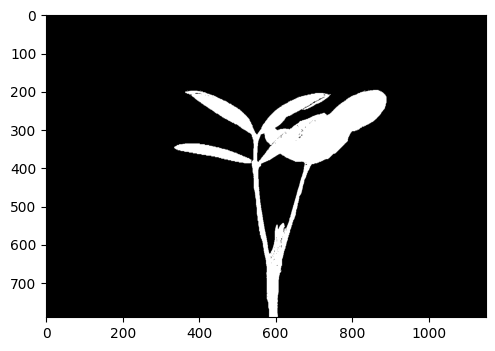

In [14]:
roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img=raw_img, 
                                                               roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=identified_img, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')

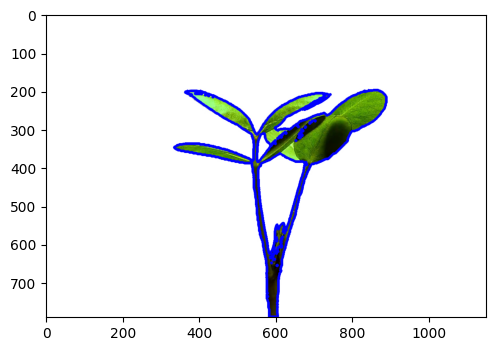

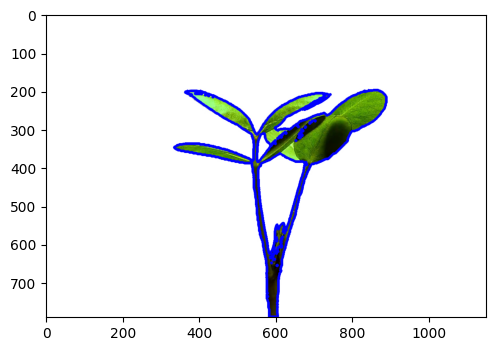

In [15]:
# Object combine kept objects
composed, mask = pcv.object_composition(img=raw_img, contours=roi_objects, hierarchy=hierarchy)

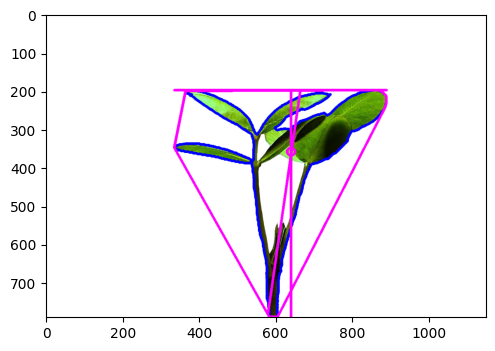

In [16]:
# Find shape properties, data gets stored to an Outputs class automatically
analysis_img = pcv.analyze_object(img=raw_img, obj=composed, mask=mask, label="default")

In [51]:
pcv.outputs.observations

{'default': {'branch_pts': {'trait': 'list of branch-point coordinates identified from a skeleton',
   'method': 'plantcv.plantcv.morphology.find_branch_pts',
   'scale': 'pixels',
   'datatype': "<class 'list'>",
   'value': [(593, 752),
    (594, 748),
    (612, 740),
    (596, 726),
    (597, 716),
    (597, 697),
    (594, 697),
    (597, 694),
    (597, 689),
    (605, 672),
    (618, 671),
    (582, 668),
    (611, 666),
    (609, 666),
    (594, 665),
    (597, 664),
    (594, 659),
    (593, 660),
    (607, 658),
    (617, 643),
    (588, 643),
    (580, 643),
    (580, 637),
    (619, 634),
    (621, 633),
    (580, 622),
    (580, 618),
    (580, 616),
    (572, 607),
    (578, 606),
    (626, 603),
    (578, 599),
    (578, 595),
    (584, 585),
    (578, 585),
    (577, 578),
    (632, 574),
    (627, 571),
    (577, 559),
    (577, 554),
    (577, 550),
    (654, 541),
    (651, 541),
    (641, 541),
    (653, 539),
    (644, 535),
    (578, 534),
    (619, 533),
    (621,